In [1]:
from stesml.model_tools import final_train
from stesml.model_tools import validate_model
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

from tensorflow import keras

from stesml.stes_model import stes_model

import xgboost as xgb

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [135]:
plot = True

In [53]:
# Model names
# NN model truncated at t <= 360: 'NN_20220708-22'
# NN model for full run time: 'NN_20220708-23'
# XGBoost model for full run time 'XGBoost_20220708-21'
# XGBoost model truncated at t >= 360 'XGBoost_20220709-08'

In [130]:
# Train the XGBoost model for t >= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'XGBoost_20220708-21'
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
t_min = -1
truncated = False

In [131]:
parameters = stes_model.get_parameters(model_type, truncated)

In [132]:
train_model = True

if train_model:
    model, addendum = final_train(data_dir, model_type, target, scale, parameters, t_min=t_min)

[08:21:39] WARNING: ../src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:92.39311
[20]	train-rmse:32.48398
[40]	train-rmse:10.71354
[60]	train-rmse:5.31156
[80]	train-rmse:3.35193
[100]	train-rmse:2.77502
[120]	train-rmse:2.47803
[140]	train-rmse:2.27032
[159]	train-rmse:2.16085


In [143]:
save_model_and_addendum = True

if save_model_and_addendum:
    stes_model.save_model(model, model_type, addendum)

In [109]:
load_model_and_addendum = True
    
if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

In [133]:
t_min = -1 # If building final model, set t_min to -1 here
h_results = validate_model(model, model_type, data_dir, target, scale, addendum, t_min)

RMSE: 4.8712523, R2: 0.9965206


In [134]:
h_df = h_results['val_df']

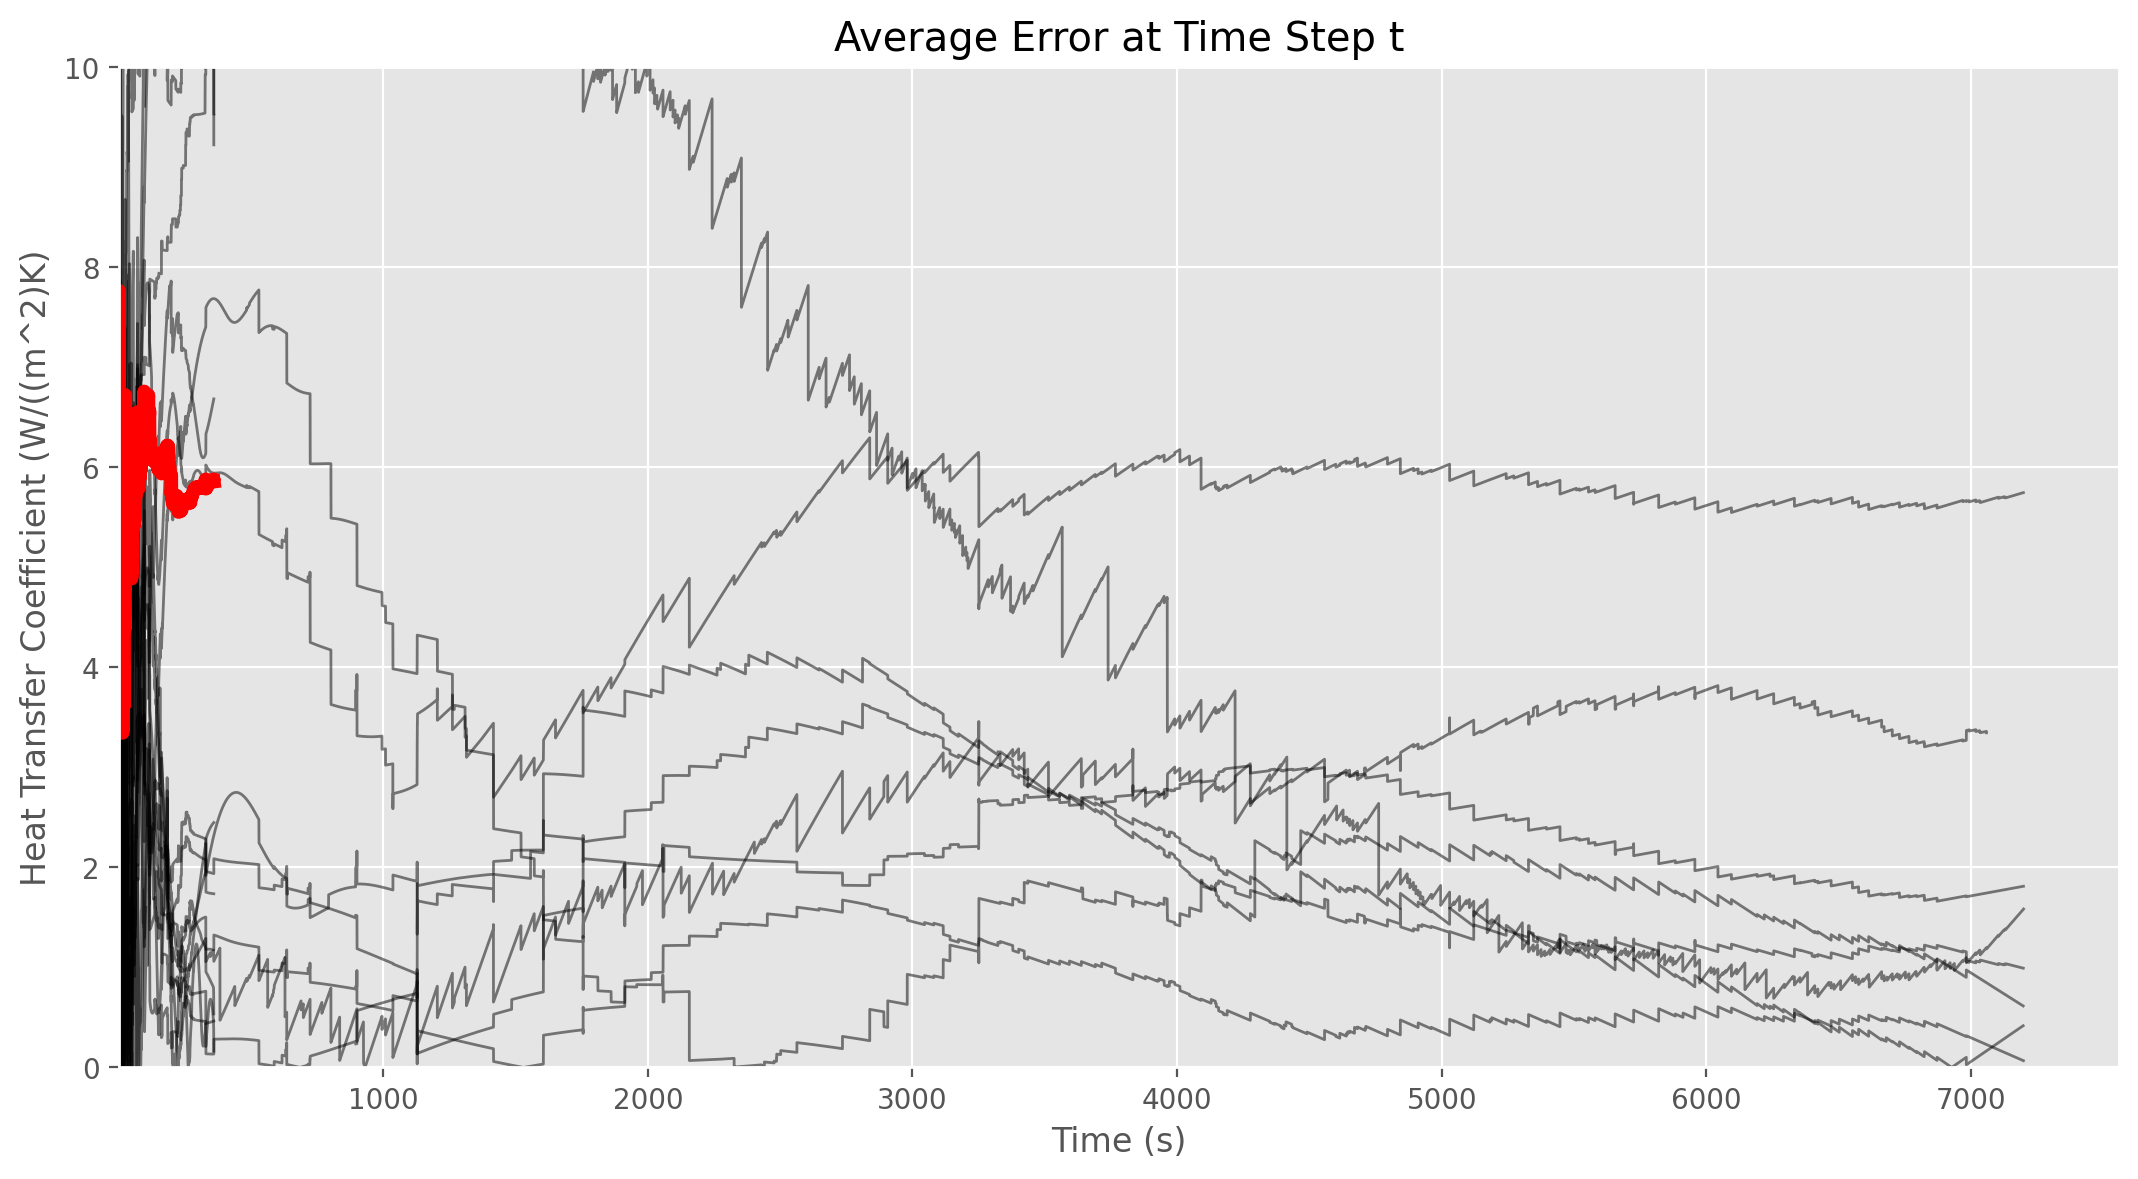

In [136]:
if plot:
    avg_error = plot_average_error(h_df, target=target, t_min=t_min)

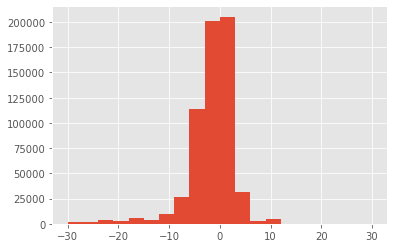

In [137]:
if plot:
    (h_df['h'] - h_df['h_hat']).hist(bins=20, range=(-30, 30))

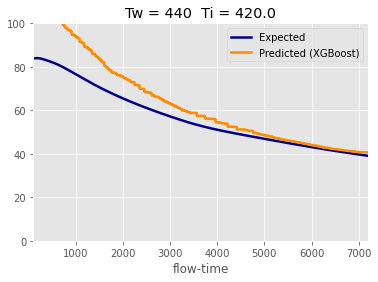

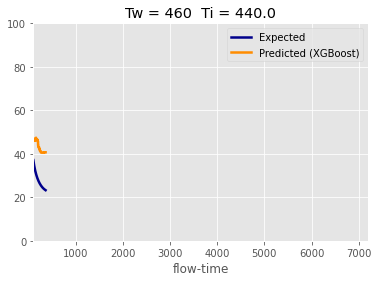

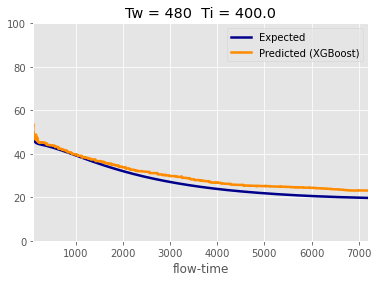

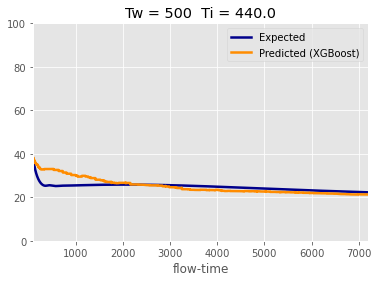

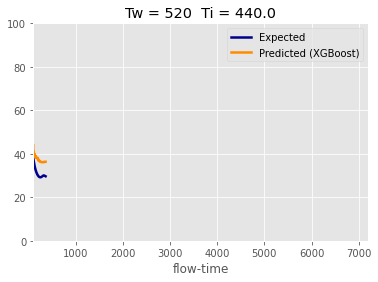

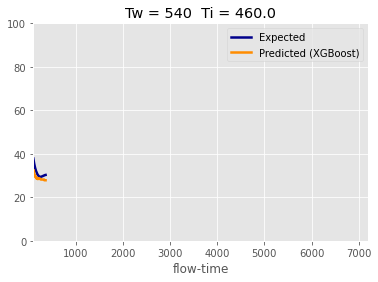

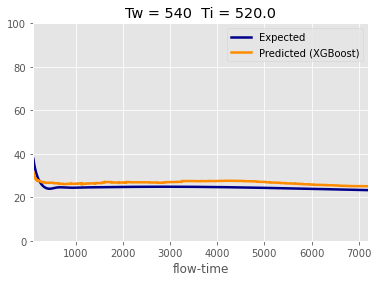

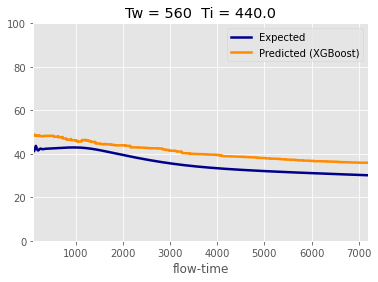

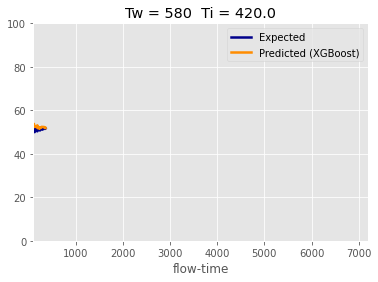

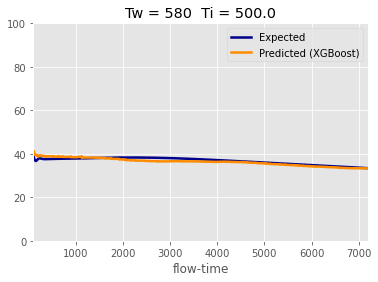

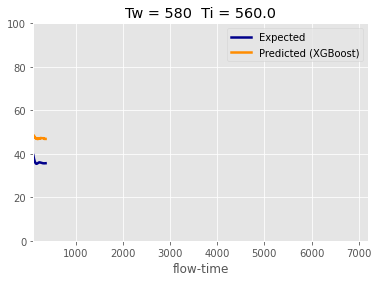

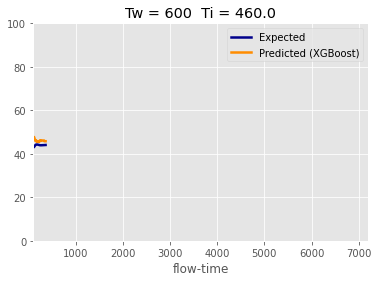

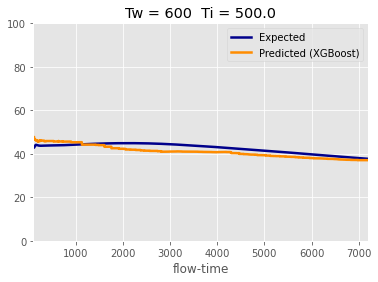

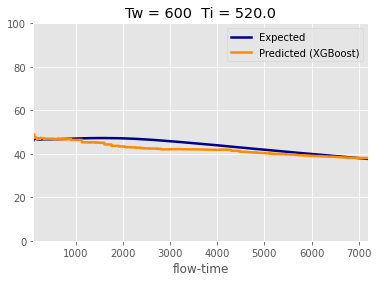

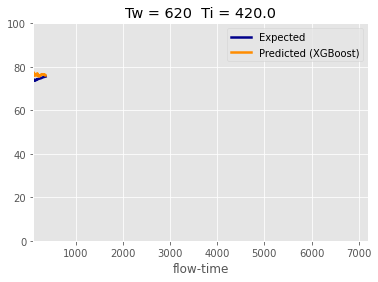

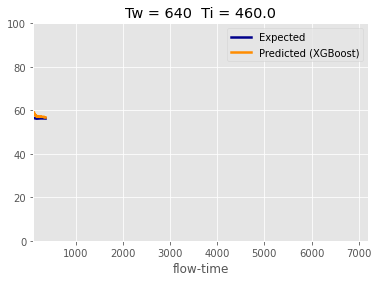

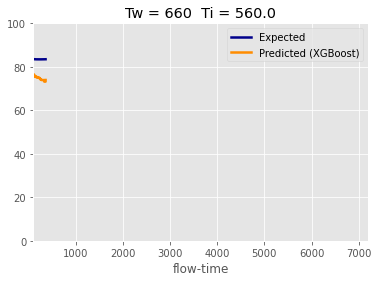

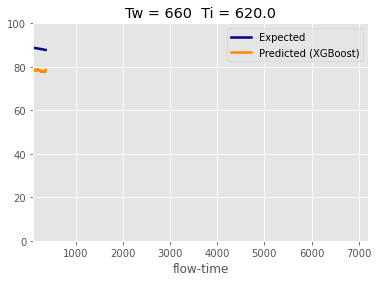

In [138]:
if plot:
    plot_test_results(h_df, model_type, target='h')

In [116]:
# Train the NN model for t <= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'NN_20220708-22'
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1
t_max=360
truncated=True

In [117]:
parameters = stes_model.get_parameters(model_type, truncated)

In [118]:
train_model = False

if train_model:
    model, addendum = final_train(data_dir, model_type, target, scale, parameters, t_max=t_max)

In [119]:
save_model_and_addendum = False

if save_model_and_addendum:
    stes_model.save_model(model, model_type, addendum)

In [120]:
load_model_and_addendum = True

if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

In [121]:
t_max = -1 # If building final model, set t_max to -1 here
T_results = validate_model(model, model_type, data_dir, target, scale, addendum, t_max=t_max)

RMSE: 118.8024065, R2: -4.9438996


In [122]:
T_df = T_results['val_df']

In [139]:
h_df['Tavg_hat'] = T_df['Tavg_hat']

In [124]:
if plot:
    avg_error = plot_average_error(T_df, target=target, t_max=t_max)

In [125]:
if plot:
    (T_df['Tavg'] - T_df['Tavg_hat']).hist(bins=20, range=(-30, 30))

In [126]:
if plot:
    plot_test_results(T_df, model_type, target='Tavg')

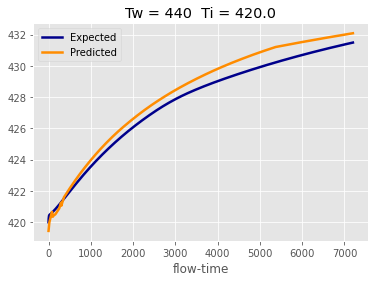

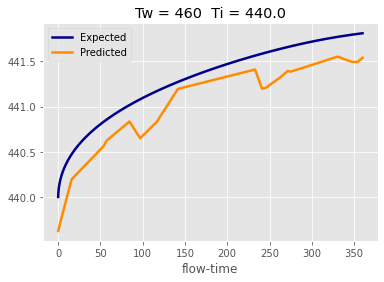

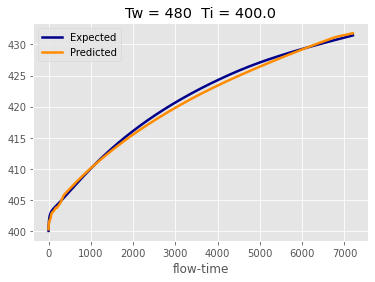

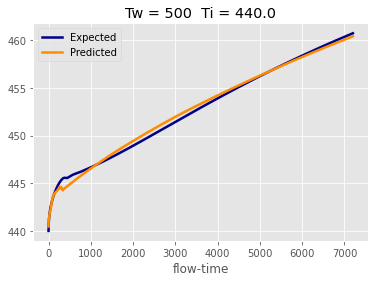

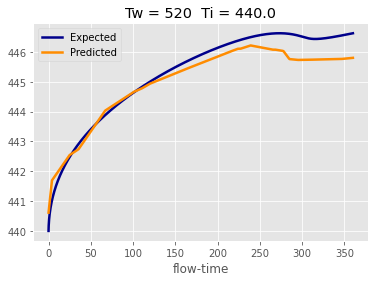

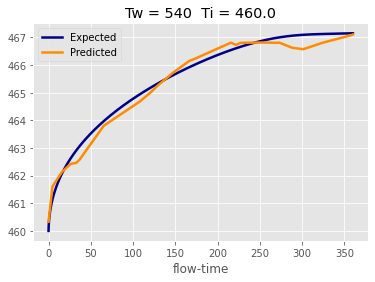

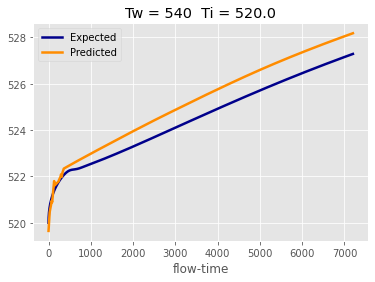

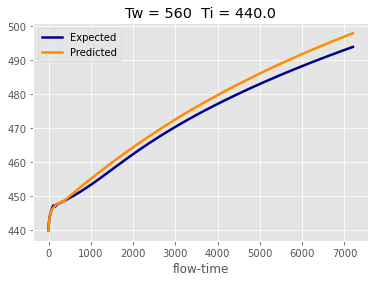

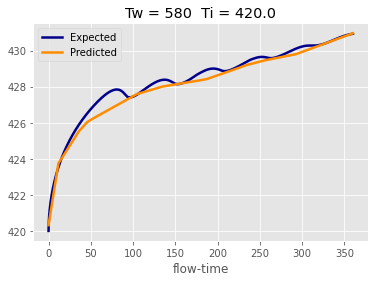

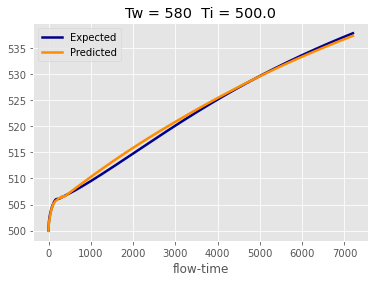

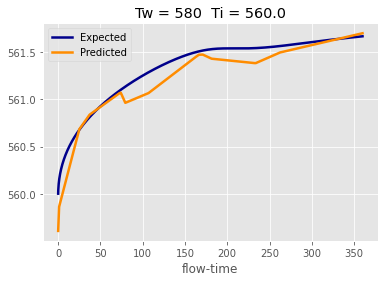

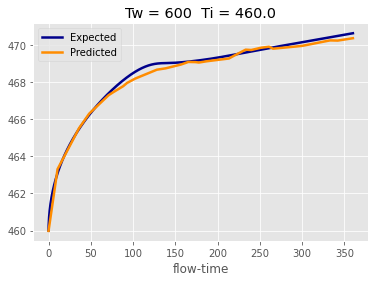

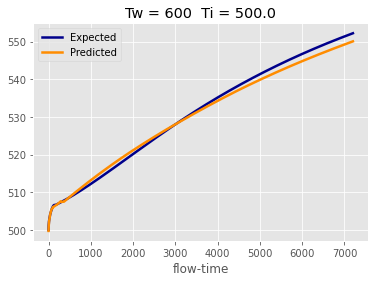

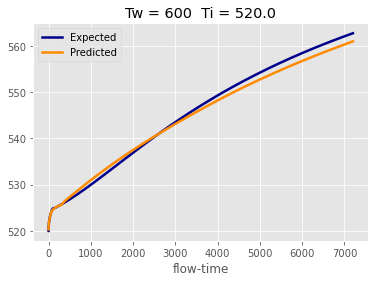

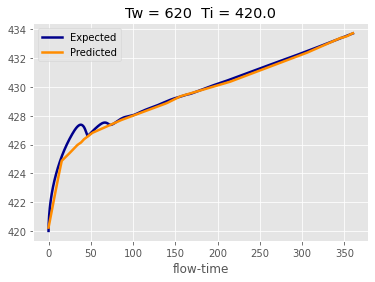

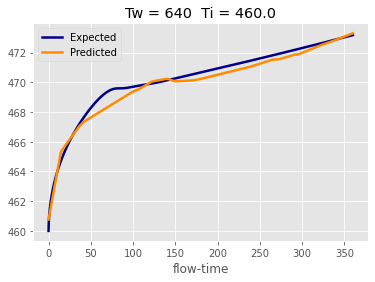

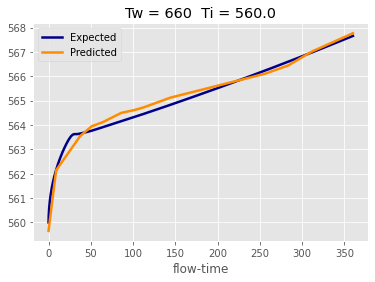

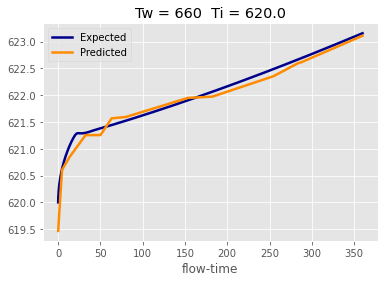

In [140]:
rmse, r2 = get_T_from_h_results(h_df, plot=True)

In [141]:
print(rmse)

1.1864773271744387


In [142]:
print(r2)

0.9994071567504565
